# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


### Шаг 3. Исследуйте данные и ответьте на вопросы

Далее нам предстоит определить, какие факторы могут влиять на возврат кредита в срок.

Такими факторами могут быть:
1. Наличие, или отсутствие детей.
2. Семейное положение.
3. Уровень дохода заёмщика.

Разумеется это не единственные факторы, которые могут влиять на вероятность возврата кредита. Но в данной работе мы исследуем влияние приведённых выше факторов.

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для начала мы попытаемся определить, влияет ли в принципе наличие/отсутствие детей на возврат кредита в срок. Для этого мы создадим дополнительный столбец `children_id`, значения в котором могут принимать 1 в случае наличия детей, и 0 в случае их отсутствия.

После этого мы создадим сводную таблицу `data_pivot_children_id`, сгруппированную по признаку наличия/отсутствия детей (т.е. по столбцу `children_id`) со значениями стоблца `debt`, к которому мы применяем функции `sum`, `count`, и `mean`. Таким образом мы сможем найти колличество "должников" по отношению к общему колличеству людей в заданной категории.

In [22]:
# Функция для определения признака наличия/отсутствия детей
def children_check(n_children):
    if n_children == 0:
        return 0
    else:
        return 1
    
# Применяем функцию к столбцу 'children', а полученные значения заносим в новый столбец 'children_id'
data['children_id'] = data['children'].apply(children_check)

#1 Строим сводную таблицу
#2 Переименовываем названия полученных колонок
#3 Округляем значения вероятности возврата кредита и переводим значение в проценты путем уножения на 100
#4 Выводим полученную таблицу на экран
data_pivot_children_id = data.pivot_table(index='children_id', values='debt', aggfunc=['sum', 'count', 'mean']) #1
data_pivot_children_id.columns = ['debt_sum', 'total', 'debt_mean'] #2
data_pivot_children_id['debt_mean'] = data_pivot_children_id['debt_mean'].round(4) * 100 #3
data_pivot_children_id.head() #4

,debt_sum,total,debt_mean
children_id,,,
0,1063,14091,7.54
1,669,7240,9.24


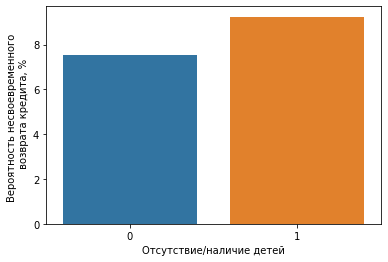

In [23]:
# Визуализируем полученные данные табицы с помощью столбчатой диаграммы
seaborn.barplot(
    data=data_pivot_children_id,
    x=data_pivot_children_id.index,
    y='debt_mean').set(
    xlabel='Отсутствие/наличие детей',
    ylabel='Вероятность несвоевременного \n возврата кредита, %');

**Таким образом вероятность несвоевременного возврата кредита у людей с детьми составляет 9.2%, что на 1.7% выше, чем у людей без детей, для которых данная вероятность составляет 7.5%.**

Теперь попробуем разобораться, как конкретное количество детей влияет на вероятность несвоевременного возврата. Построем сводную таблицу, аналогичную той, которую мы строили выше по признаку наличия/отсутствия детей, только в этот раз данные сгруппируем по столбцу количества детей `children`.

In [24]:
# Строим сводную таблицу
data_grouped_children = data.groupby('children').agg({'debt': ['sum', 'count', 'mean']})
data_grouped_children.columns = ['debt_sum', 'total', 'debt_mean']
data_grouped_children['debt_mean'] = data_grouped_children['debt_mean'].round(4) * 100
data_grouped_children.head(10)

,debt_sum,total,debt_mean
children,,,
0,1063,14091,7.54
1,444,4808,9.23
2,194,2052,9.45
3,27,330,8.18
4,4,41,9.76
5,0,9,0.00


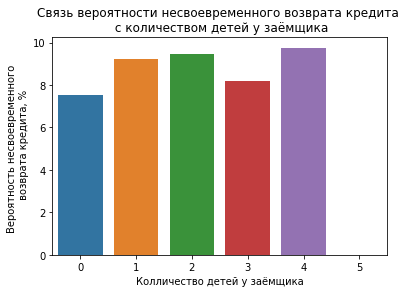

In [25]:
# Визуализируем данные таблицы
seaborn.barplot(
    data=data_grouped_children,
    x=data_grouped_children.index,
    y='debt_mean').set(
    xlabel='Колличество детей у заёмщика',
    ylabel='Вероятность несвоевременного \n возврата кредита, %',
    title='Связь вероятности несвоевременного возврата кредита \n с количеством детей у заёмщика');

**Вывод:**  

Здесь стоит заметить, что общее колличество заёмщиков без детей (14 091) сильно превышает колличество заёмщиков с тремя и более детей (всего 380), поэтому сопоставление между данными категориями не могут быть корректрными в следствии нерепрезентативности выборки заёмщиков с колличеством детей 3 и более. То есть **локальную аномалию на графике для заёмщиков с тремя детьми стоит рассматривать, как ложную.** Это же касается и категории людей с 5 детьми.

Люди, которые не имеют детей, лучше всего отдают кредит, доля должников здесь составляет с 7,5%. Хуже обстоит дело с кредиторами, кто имеет одного или двух детей, здесь доля невозврата составляет соответственно 9,2% и 9,4%. Остальные категории сравнивать некорректно вследствии маленькой выборки (всего 380 человек).

В целом, выводы для конкретного числа детей у заёмщика повторяют сделанные нами выше выводы в случае наличия, или отсутствия детей: **вероятность несвоевременного возврата кредита у людей с детьми примерно на 1.7% выше, чем у людей без детей.**

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Построим сводную таблицу, сгруппированную по столбцу `family_status`, который сооветствует семейному положению заёмщика.

In [26]:
# Строим сводную таблицу
data_pivot_family_status = data.pivot_table(index='family_status', values='debt', aggfunc=['sum', 'count', 'mean'])
data_pivot_family_status.columns = ['debt_sum', 'total', 'debt_mean']
data_pivot_family_status['debt_mean'] = data_pivot_family_status['debt_mean'].round(4) * 100
# Сортируем значения в таблице по убыванию вероятности возврата кредита
data_pivot_family_status = data_pivot_family_status.sort_values(by='debt_mean', ascending=False)
data_pivot_family_status.head()

,debt_sum,total,debt_mean
family_status,,,
Не женат / не замужем,273,2796,9.76
гражданский брак,385,4134,9.31
женат / замужем,927,12261,7.56
в разводе,84,1189,7.06
вдовец / вдова,63,951,6.62


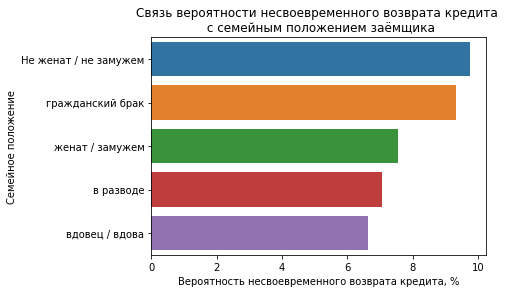

In [27]:
# Визуализируем данные таблицы
seaborn.barplot(
    data=data_pivot_family_status,
    y=data_pivot_family_status.index,
    x='debt_mean').set(
    ylabel='Семейное положение',
    xlabel='Вероятность несвоевременного возврата кредита, %',
    title='Связь вероятности несвоевременного возврата кредита \n с семейным положением заёмщика');

**Вывод:** 

Ранжирование категорий в соответствии с вероятностью своевременного возврата кредита привела к любопытным результатам. Каждый из столбцов начиная от "не замужем" до "вдова" вполне может характеризовать определённый жизненный этап отдельного человека. **Очень вероятно, что мы бы получили аналогичный характер распределения в зависимости от возраста заёмщика, т.е. уменьшение вероятности несвоевременного возврата кредита с увеличением возраста.**


Вероятность несвоевременного возврата кредита людей состоящих/состовших в официально оформленных отношениях составляет 6.6% в категории "вдова", 7% в категории "в разводе" и 7.5% в категории "женат/замужем". При этом резкое увеличение доли несвоевременно вохвращённых кредитов происходит при переходе к категориям "гражданский брак" (9.3%) и "не женат/не замужем" (наибольшее значение в выборке 9.76%).

Таким образом, **вероятность несвоевременного возврата кредита людей состоящих/состовших в официально оформленных отношениях в среднем на 2% ниже по отношению к людям не состоящих в отношениях, или не оформлявщих свои отношения официально.** Возможно люди, которые готовы к официальному оформлению отношений, охотнее готовы брать на себя ответственность, и как следствие, являются более надёжными кредитополучателями.

Похоже всё-таки "штамп в паспорте" что-то значит :) 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Построим сводную таблицу, сгруппированную по столбцу `total_income_category`, который сооветствует уровню дохода заёмщика. Ранее мы распределили заёмщиков по категориям дохода по следующему правилу:

Категория | Расшифровка категории | Доход
--- | --- | --- 
E | Низкий | до 30 тыс.
D | Ниже среднего | от 30 тыс. до 50 тыс
C | Средний | от 50 тыс. до 200 тыс.
B | Выше среднего | от 200 тыс. до 1 млн.
A | Высокий | более 1 млн.

In [28]:
# Строим сводную таблицу
data_pivot_income = data.pivot_table(index='total_income_category', values='debt', aggfunc=['sum', 'count', 'mean'])
data_pivot_income.columns = ['debt_sum', 'total', 'debt_mean']
data_pivot_income['debt_mean'] = data_pivot_income['debt_mean'].round(4) * 100
data_pivot_income.head()

,debt_sum,total,debt_mean
total_income_category,,,
A,2,25,8.00
B,354,5014,7.06
C,1353,15921,8.50
D,21,349,6.02
E,2,22,9.09


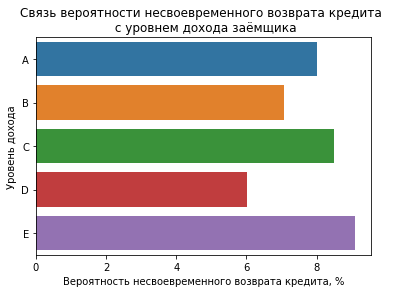

In [29]:
# Визуализируем данные таблицы
seaborn.barplot(
    data=data_pivot_income,
    y=data_pivot_income.index,
    x='debt_mean').set(
    ylabel='Уровень дохода',
    xlabel='Вероятность несвоевременного возврата кредита, %',
    title='Связь вероятности несвоевременного возврата кредита \n с уровнем дохода заёмщика');

**Вывод:** 

Сразу заметим, что мы не наблюдаем явно выраженной зависимости между увеличением дохода и уменьшением вероятности возврата кредита. С другой стороны, Столбцы E, C, и A демонстрируют подобный тренд.

Наиболее представительной по колличеству человек является выборка по столбцам B и C. Наиболее надёжно можно сделать вывод именно сравнивая данные две категории: **вероятность несвоевременного возврата кредита у людей с доходом выше среднего составляет 7% и примерно на 1.5% ниже, чем у людей со средним уровнем дохода, для которых она составляет 8.5%.**

Возможно, проведенная нами группировка по категориям не является наиболее оптимальной, а диапазоны, формирующие класс с определённым уровнем дохода стоит пересмотреть. Также, возможно, имеет смысл уменьшить колличество категорий до трёх, тем самым обеспечив более представительную выборку в категории.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Построим сводную таблицу, сгруппированную по столбцу `purpose_category`, который сооветствует цели кредита.

In [30]:
# Строим сводную таблицу
data_pivot_purpose = data.pivot_table(index='purpose_category', values='debt', aggfunc=['sum', 'count', 'mean'])
data_pivot_purpose.columns = ['debt_sum', 'total', 'debt_mean']
data_pivot_purpose['debt_mean'] = data_pivot_purpose['debt_mean'].round(4) * 100
data_pivot_purpose = data_pivot_purpose.sort_values(by='debt_mean', ascending=False)
data_pivot_purpose.head()

,debt_sum,total,debt_mean
purpose_category,,,
операции с автомобилем,400,4279,9.35
получение образования,369,3988,9.25
проведение свадьбы,183,2313,7.91
операции с недвижимостью,780,10751,7.26


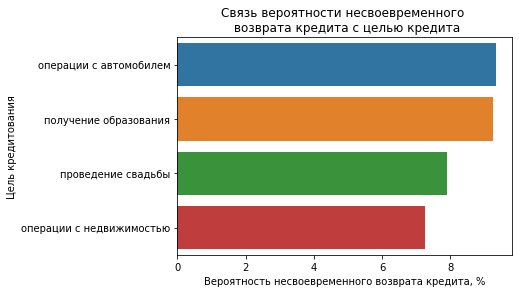

In [31]:
# Визуализируем данные таблицы
seaborn.barplot(
    data=data_pivot_purpose,
    y=data_pivot_purpose.index,
    x='debt_mean').set(
    ylabel='Цель кредитования',
    xlabel='Вероятность несвоевременного возврата кредита, %', 
    title='Связь вероятности несвоевременного \n возврата кредита с целью кредита');

**Вывод:** 

**Вероятность несвоевременного возврата кредита по операциям с автомобилем и получением образования приблизительно одинакова и составляет около 9.3%. Вероятность возврата кредита на проведение свадьбы ниже, чем в предыдущих двух категориях и составляет 7.9%.**

**Наименьшее относительное количество возвратов кредита демонстрирует категория операций с недвижимостью. В этой категории вероятность возврата составляет 7.2%.**

Более того, операции с недвижимостью обычно предполагают срок кредитования, который в разы превышает сроки по свадьбам, образованию, или даже на покупку автомобиля. То есть подобные кредиты треуют большей финансовой ответственности и надёжности, нежели чем кредиты, связанные с иными приведёнными в таблице целями. Также размеры кредитов на покупку недвижимости в разы превышают размеры кредитов в других категориях, и, как следствие, требуют от банка больше внимания к анализу финансовых гарантий от заёмщика. Именно поэтому вероятность несвоевременного возврата кредита в данной категории оказывается самой низкой и характеризует людей в категории "операции с недвижимостью", как наиболее надёжных заёмщиков.

Можно было бы предположить, что уменьшение размера кредита будет приводить к увеличению вероятности его несвоевременного возврата, т.к. банк охотнее и с минимальными проверками выдаст человеку кредит на небольшую сумму, но тогда не ясно, как объяснить наибольшее количество несвоевременных возвратов в категории "операции с автомобилем".

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*

Сразу заметим, что количество пропусков в столбцах `total_income` и `days_employed` совпадает.

Можно было бы предположить, что данные пропуски связаны с безработными людьми, но это не так. Также можно было бы предположить наличие пропусков в первоисточниках, т.к. некоторые люди могли намеренно не указывать свою ЗП, или значение `days_employed` могло быть неактуальным для такой категории людей, как 'пенсионеры' и также могло быть упущено при заполнении. Но подоюные причины предполагают некоторую случайность и вариативность в значениях.

Мы же наблюдаем иную ситуацию. Пропущенные значения встречаются всегда одномременно в обоих столбцах сразу, и никогда не встречаются в одном из столбцов по отдельности. Из этого мы делаем вывод о неслучайном зарактере наличия подобных пропусков. Таким образом, появление пропусков может быть связано с ошибками при выгрузке данных, или с ошибками при формировании сводного набора данных.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Распределение данных может быть сильно отлично от нормального и при расчёте среднего арифметического наличие возможных "вылетающих значений" может существенно исказить получаемое среднее. Использование медианного среднего в данном случае будет играть роль фильтра, избавляющего данные от "вылетающих значений".

### Шаг 4: общий вывод.

Предоставленные данные содержали информацию о платёжеспособности клиентов банка.

На этапе предобработки данным нами были выявлены и устранены пропуски в данных, аномальные значения, а также дубликаты. В ходе анализа пропусков мы пришли к выводу, что вероятнее всего наличие пропусков связано с ошибками при выгрузке данных, или с ошибками при формировании сводного набора данных.

Основной задачей, поставленной перед данным исследованием, было изучение гипотезы о наличии взаимосвязей между различными характеристиками людей и вероятностью несвоевременного возврата кредита. Нами были исследованы факторы связанные с наличием детей у кредитополучателя, его семейным положением, уровнем дохода, и целью предоставления кредита. В результате мы при пришли к следующим основным выводам:
1. Вероятность несвоевременного возврата кредита у людей с детьми составляет 9.2%, что на 1.7% выше, чем у людей без детей, для которых данная вероятность составляет 7.5%.
2. Вероятность несвоевременного возврата кредита людей состоящих/состовших в официально оформленных отношениях составляет 6.6% в категории "вдова", 7% в категории "в разводе" и 7.5% в категории "женат/замужем". При этом резкое увеличение доли несвоевременно вохвращённых кредитов происходит при переходе к категориям "гражданский брак" (9.3%) и "не женат/не замужем" (наибольшее значение в выборке 9.76%). Таким образом, люди состоящие/состовшие в официально оформленных отношениях в среднем на 2% чаще возвращают кредиты вовремя по отношению к людям не состоящих в отношениях, или не оформлявщих свои отношения официально.
3. Вероятность несвоевременного возврата кредита у людей с доходом выше среднего составляет 7% и примерно на 1.5% ниже, чем у людей со средним уровнем дохода, для которых она составляет 8.5%. Явная коррелиция между увеличением дохода и уменьшением вероятности возврата кредита отсутствует.
4. Вероятность несвоевременного возврата кредита по операциям с автомобилем и получением образования приблизительно одинакова и составляет около 9.3%. Вероятность возврата кредита на проведение свадьбы ниже, чем в предыдущих двух категориях и составляет 7.9%. Наименьшее относительное колличество возвратов кредита демонстрирует категория операций с недвижимостью. В этой категории вероятность возврата составляет 7.2%.

